<a href="https://colab.research.google.com/github/Rahul081203/ML_projects/blob/master/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#Analysing the dataset and making a pandas dataframe

In [ ]:
data=pd.read_csv('/content/churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.drop('customerID',axis=1,inplace=True) # as customerId is not useful in our case

In [ ]:
data.shape # to check the number of rows and columns

(7043, 20)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# as we can see that the TotalCharges field is of the object datatype, we need to typecast
pd.to_numeric(data['TotalCharges'],errors='coerce') # to change the datatype irrespective of the null values

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
data.isnull() # to check the dataset for null values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()].shape # to check the number of null rows

(11, 20)

In [ ]:
df=data[data.TotalCharges!=' '] # selecting only the rows where the TotalCharges!=' ' 
df.shape

(7032, 20)

In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#Feature Dependence
<li>Tenure</li>

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


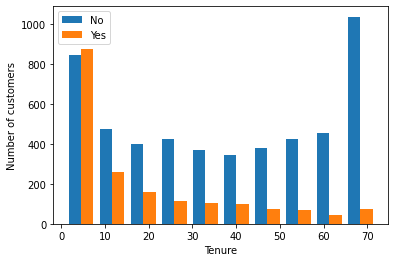

In [ ]:
tenure_no=df[df.Churn=='No'].tenure
tenure_yes=df[df.Churn=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.hist([tenure_no,tenure_yes],label=["No","Yes"])
plt.legend()

***So we can clearly see that the customers associated with the service for a longer duration have a very less churn***<br><li>Monthly Charges</li>

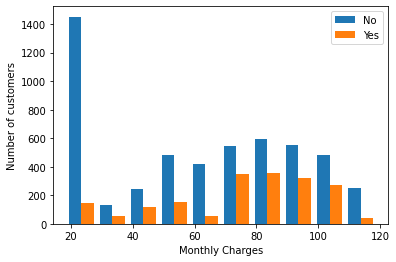

In [ ]:
m_charges_no=df[df.Churn=='No'].MonthlyCharges
m_charges_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.hist([m_charges_no,m_charges_yes],label=["No","Yes"])
plt.legend()

In [ ]:
def display_unique(df,s):
  for column in df:
    if df[column].dtype!=s:
      print(f"{column}:{df[column].unique()}")
display_unique(df,'float64')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df.replace("No internet service","No",inplace=True) # inplace updates the value of the dataframe automatically
df.replace("No phone service","No",inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


Replacing all the Yes and No's with 1's and 0's respectively

In [ ]:
boolean_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in boolean_cols:
  df[col].replace({'Yes':1,'No':0},inplace=True)
display_unique(df,'None')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Now, watching that there are also some columns with more than just two possible values, we have to use one-hot encoding by use of the dummy function provided by the pandas module

In [ ]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,Female,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,Female,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,Male,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


As we can see that previously we had 20 columns and now, that we have splitted using the one hot encoding, we converted 3 columns into 10 columns and hence, 7 more columns have been generated as compared to the previous one.

In [ ]:
df1.replace({'Male':1,'Female':0},inplace=True)
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
# there are 3 columns which have feature values over a wide range of values
# these are tenure,MonthlyCharges, and TotalCharges

cols=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler # scaler normalizes the values by dividing with the upperlimit i.e., b/w 0 and 1
scaler=MinMaxScaler()
df1[cols]=scaler.fit_transform(df1[cols])

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X=df1.drop('Churn',axis=1)
Y=df1['Churn']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

#Neural Network Formulation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

model=keras.Sequential([
    Dense(units=20,activation='relu'), # input layer
    Dense(units=15,activation='relu'), # hidden layer
    Dense(units=1, activation='sigmoid') # output layer
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 2s 5ms/step - loss: 0.5624 - accuracy: 0.7172
Epoch 2/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4512 - accuracy: 0.7710
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4351 - accuracy: 0.7899
Epoch 4/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4292 - accuracy: 0.7899
Epoch 5/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4243 - accuracy: 0.7970
Epoch 6/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4220 - accuracy: 0.7991
Epoch 7/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4197 - accuracy: 0.7972
Epoch 8/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4184 - accuracy: 0.8017
Epoch 9/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4169 - accuracy: 0.8037
Epoch 10/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.8050

Training test accuracy is about 82%

In [ ]:
model.evaluate(x_test,y_test)

66/66 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7839


[0.44115933775901794, 0.7838862538337708]

Test set accuracy is about 78.48 %

In [ ]:
y_predict_test=model.predict(x_test)

66/66 [==============================] - 0s 1ms/step


In [ ]:
y_predict_test

array([[1.2150656e-03],
       [7.4534684e-01],
       [3.5723474e-02],
       ...,
       [4.8646349e-01],
       [4.6755815e-01],
       [6.6940568e-04]], dtype=float32)

If the threshold value is 0.5 then we can convert the values lower than that to 0 and the values more than that to 1

In [ ]:
y_p=[]
for i in y_predict_test:
  if i>0.5:
    y_p+=[1]
  else:
    y_p+=[0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1555
           1       0.61      0.51      0.55       555

    accuracy                           0.78      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110



Text(69.0, 0.5, 'Truth')

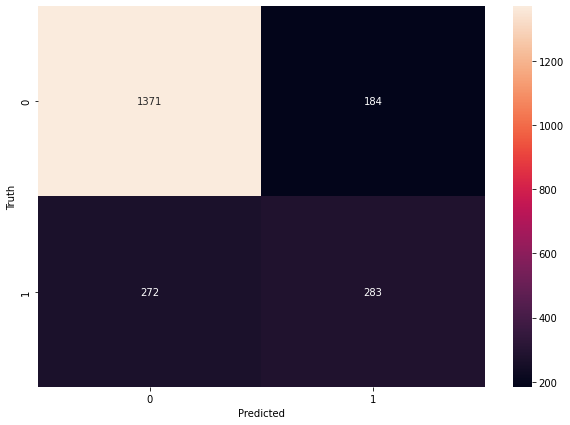

In [ ]:
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_p)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')